In [1]:
from scipy.io import loadmat
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import time
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
mnist = loadmat("mnist2/mnist-original.mat")
x = mnist["data"].T
y = mnist["label"][0]

In [3]:
print(y)

[0. 0. 0. ... 9. 9. 9.]


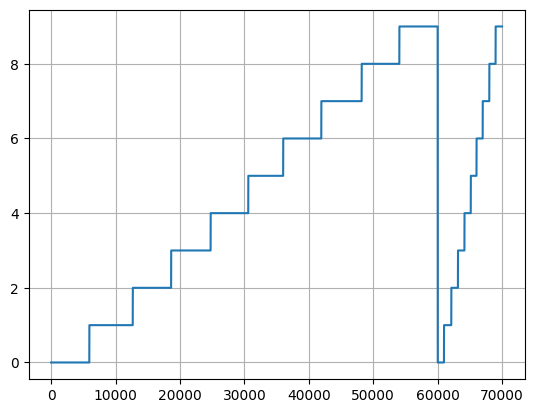

In [4]:
plt.figure(0)
plt.plot(y)
plt.grid()
plt.show()

In [5]:
split = 60000
train_x, train_y, test_x, test_y = x[:split], y[:split], x[split:], y[split:]
print(train_x.shape, test_x.shape)

(60000, 784) (10000, 784)


In [6]:
def compare_result(X, y):
    fig, axes = plt.subplots(nrows=1, ncols=len(y[:7]), figsize = (15, 5))
    for ax, image, label in zip(axes, X[:7], y[:7]):
        ax.set_axis_off()
        ax.imshow(image.reshape((28, 28)), cmap = plt.cm.gray_r)
        ax.set_title("Predicted: %s" % str(label))

In [7]:
def show_images(x):
    ncols = 10
    nrows = len(x) // ncols + (len(x) % ncols > 0)
    count = 0
    for row in range(1, nrows):
        fig, ax = plt.subplots(1, ncols)
        for col in range(ncols):
            image = x[count]
            ax[col].imshow(image.reshape((28, 28)), cmap = plt.cm.gray_r)
            ax[col].axis('off')
            count += 1

In [17]:
X_01 = x[(y == 0) | (y == 1)]
y_01 = y[(y == 0) | (y == 1)]

X_37 = x[(y == 3) | (y == 7)]
y_37 = y[(y == 3) | (y == 7)]

X_35 = x[(y == 3) | (y == 5)]
y_35 = y[(y == 3) | (y == 5)]

In [19]:
train_x01 = train_x[(train_y == 0) | (train_y == 1)].copy()
train_y01 = train_y[(train_y == 0) | (train_y == 1)].copy()
test_x01 = test_x[(test_y == 0) | (test_y == 1)].copy()
test_y01 = test_y[(test_y == 0) | (test_y == 1)].copy()
print(train_y01, train_y01.shape)
print(test_y01, test_y01.shape)

[0. 0. 0. ... 1. 1. 1.] (12665,)
[0. 0. 0. ... 1. 1. 1.] (2115,)


In [20]:
clf_svm = SVC(kernel='linear')

start = time.time()
clf_svm.fit(train_x01, train_y01)
print("time: ", time.time() - start)

prediction = clf_svm.predict(test_x01)
support_vectors = clf_svm.support_vectors_
support_indices = clf_svm.support_

print(support_indices)
print(len(support_indices))

time:  0.5677547454833984
[  112   114   142   150   576   732  1236  1513  1529  1608  1676  1720
  2007  2093  2094  2145  2148  2371  2480  2512  2786  2848  2934  2956
  2963  2974  3092  3191  3362  3412  3539  3754  3783  3865  3873  3954
  4207  4519  4529  4608  4652  4827  4881  4918  5675  5759  5788  5793
  5954  6060  6387  6576  6626  6695  6777  7074  7144  7411  7557  7621
  7853  8204  8386  8431  8547  8701  8731  8935  9274  9476  9530  9541
  9662  9747  9875 10077 10148 10225 10239 10934 11017 11102 11613 12018]
84


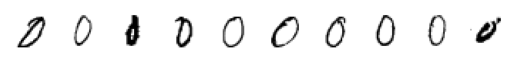

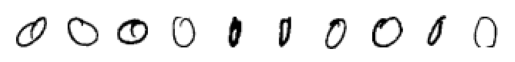

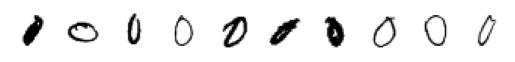

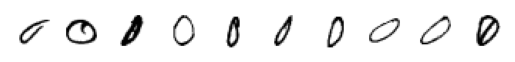

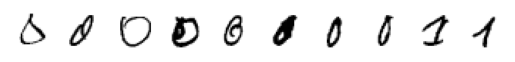

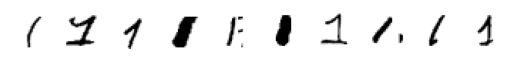

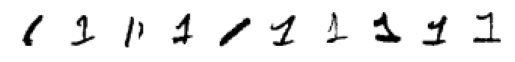

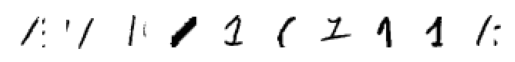

In [21]:
show_images(support_vectors)

In [22]:
feat_cols = [ 'pixel'+str(i) for i in range(X_01.shape[1]) ]

df = pd.DataFrame(X_01,columns=feat_cols)
df['y'] = y_01
df['label'] = df['y'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 10000
df_subset = df.loc[rndperm[:],:].copy()
data_subset = df_subset[feat_cols].values
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Size of the dataframe: (14780, 786)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14780 samples in 0.042s...
[t-SNE] Computed neighbors for 14780 samples in 3.568s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14780
[t-SNE] Computed conditional probabilities for sample 2000 / 14780
[t-SNE] Computed conditional probabilities for sample 3000 / 14780
[t-SNE] Computed conditional probabilities for sample 4000 / 14780
[t-SNE] Computed conditional probabilities for sample 5000 / 14780
[t-SNE] Computed conditional probabilities for sample 6000 / 14780
[t-SNE] Computed conditional probabilities for sample 7000 / 14780
[t-SNE] Computed conditional probabilities for sample 8000 / 14780
[t-SNE] Computed conditional probabilities for sample 9000 / 14780
[t-SNE] Computed conditional probabilities for sample 10000 / 14780
[t-SNE] Computed conditional probabilities for sample 11000 / 14780
[t-SNE] Computed conditional probabilities for sample 12000 / 14780
[t-SNE] Compu

df 14780
threes 6903
fives 7877


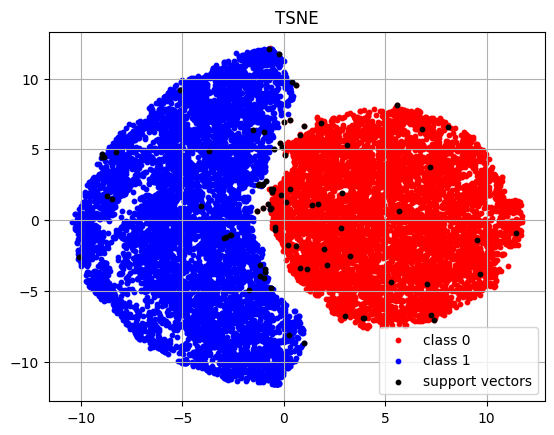

In [23]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
zeros = df_subset.loc[df['y'] == 0].copy()
ones = df_subset.loc[df['y'] == 1].copy()

print('df', len(df))
print('zeros', len(zeros))
print('ones', len(ones))
plt.figure(8)
plt.scatter(zeros['tsne-2d-one'], zeros['tsne-2d-two'], c = 'r', s = 10, label = 'class 0')
plt.scatter(ones['tsne-2d-one'], ones['tsne-2d-two'], c = 'b', s = 10, label = 'class 1')
plt.scatter(df_subset['tsne-2d-one'][support_indices], df_subset['tsne-2d-two'][support_indices], c = 'black', s = 10, label = 'support vectors')
plt.legend()
plt.grid()
plt.title('TSNE')
plt.show()

In [24]:
train_x37 = train_x[(train_y == 3) | (train_y == 7)].copy()
train_y37 = train_y[(train_y == 3) | (train_y == 7)].copy()
test_x37 = test_x[(test_y == 3) | (test_y == 7)].copy()
test_y37 = test_y[(test_y == 3) | (test_y == 7)].copy()
print(train_y37.shape, test_y37.shape)

(12396,) (2038,)


In [25]:
clf_svm = SVC(kernel='linear')

start = time.time()
clf_svm.fit(train_x37, train_y37)
print("time: ", time.time() - start)

prediction = clf_svm.predict(test_x37)
support_vectors = clf_svm.support_vectors_
support_indices = clf_svm.support_

print(support_indices)
print(len(support_indices))

time:  5.547865152359009
[    9    50    51    59   117   118   185   201   232   251   264   459
   470   562   566   648   703   704   751   791   827   828   837   839
   882   888   891   977  1107  1192  1201  1279  1298  1310  1323  1324
  1355  1422  1426  1450  1451  1485  1562  1610  1642  1644  1658  1662
  1729  1739  1814  1816  1847  1884  1903  1916  1989  2127  2136  2167
  2200  2204  2220  2222  2252  2317  2328  2414  2437  2459  2501  2543
  2544  2565  2571  2572  2578  2581  2592  2606  2726  2730  2754  2780
  2793  2813  2868  2905  2927  2930  2961  2970  3002  3013  3030  3067
  3080  3092  3117  3128  3168  3199  3200  3206  3234  3310  3333  3516
  3520  3528  3530  3599  3662  3676  3706  3732  3794  3798  3872  3975
  3977  3984  3986  4012  4019  4091  4113  4204  4243  4245  4254  4281
  4288  4300  4314  4323  4367  4381  4430  4438  4441  4469  4479  4523
  4569  4615  4705  4726  4809  4917  4928  4961  4995  5009  5038  5048
  5117  5142  5150  5208  

C:\Users\Liza-\AppData\Local\Temp\ipykernel_16080\4275822798.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, ncols)


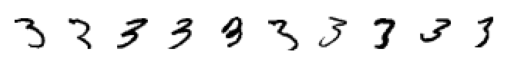

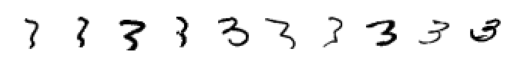

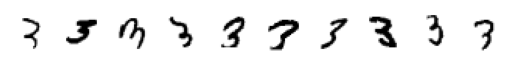

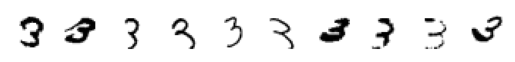

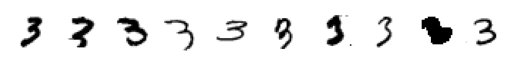

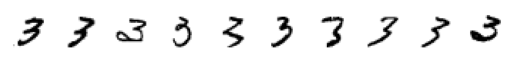

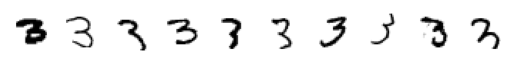

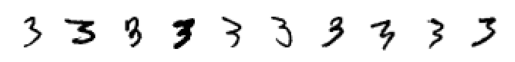

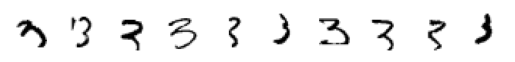

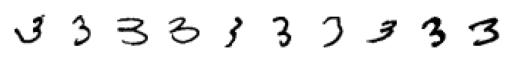

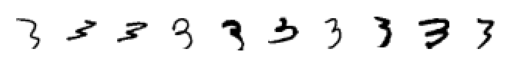

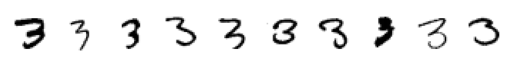

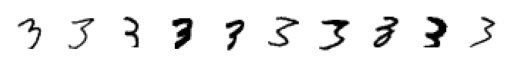

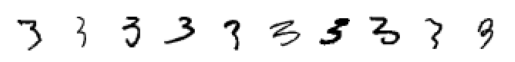

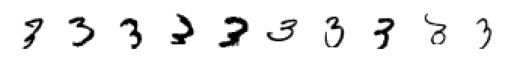

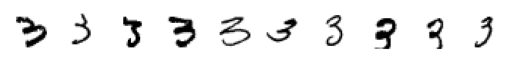

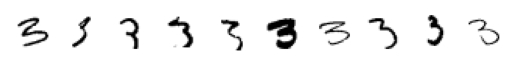

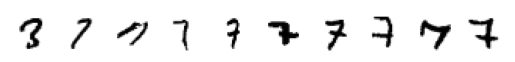

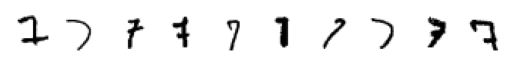

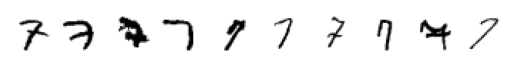

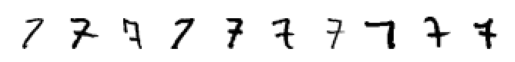

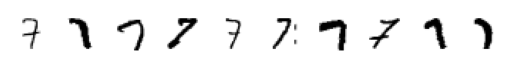

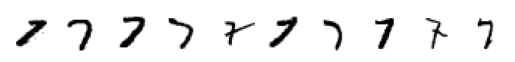

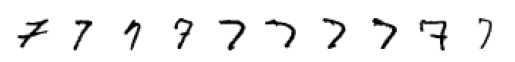

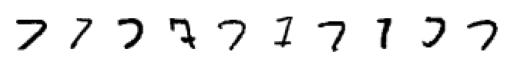

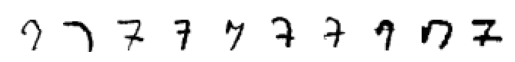

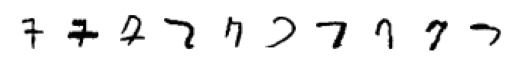

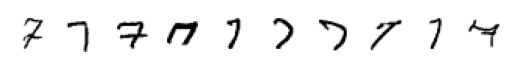

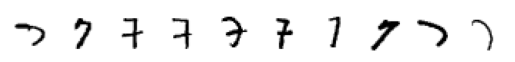

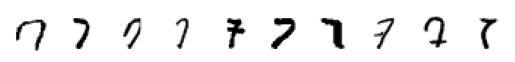

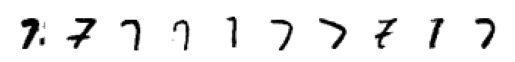

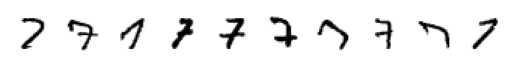

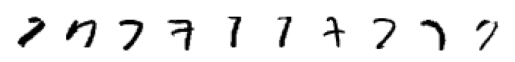

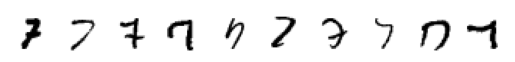

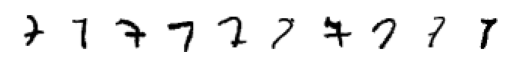

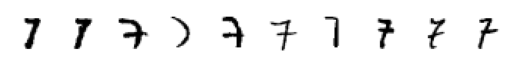

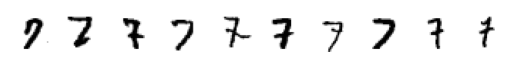

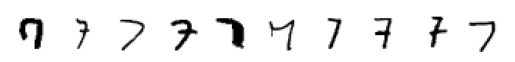

In [15]:
show_images(support_vectors)

In [27]:
feat_cols = [ 'pixel'+str(i) for i in range(X_37.shape[1]) ]

df = pd.DataFrame(X_37,columns=feat_cols)
df['y'] = y_37
df['label'] = df['y'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 10000
df_subset = df.loc[rndperm[:],:].copy()
data_subset = df_subset[feat_cols].values
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Size of the dataframe: (14434, 786)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14434 samples in 0.035s...
[t-SNE] Computed neighbors for 14434 samples in 3.397s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14434
[t-SNE] Computed conditional probabilities for sample 2000 / 14434
[t-SNE] Computed conditional probabilities for sample 3000 / 14434
[t-SNE] Computed conditional probabilities for sample 4000 / 14434
[t-SNE] Computed conditional probabilities for sample 5000 / 14434
[t-SNE] Computed conditional probabilities for sample 6000 / 14434
[t-SNE] Computed conditional probabilities for sample 7000 / 14434
[t-SNE] Computed conditional probabilities for sample 8000 / 14434
[t-SNE] Computed conditional probabilities for sample 9000 / 14434
[t-SNE] Computed conditional probabilities for sample 10000 / 14434
[t-SNE] Computed conditional probabilities for sample 11000 / 14434
[t-SNE] Computed conditional probabilities for sample 12000 / 14434
[t-SNE] Compu

df 14434
threes 7141
sevens 7293


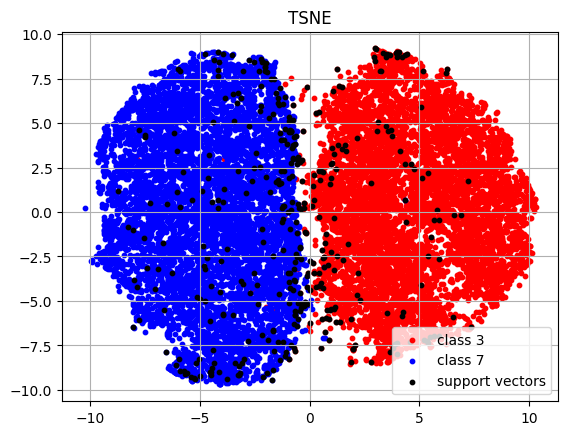

In [28]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
threes = df_subset.loc[df['y'] == 3].copy()
sevens = df_subset.loc[df['y'] == 7].copy()

print('df', len(df))
print('threes', len(threes))
print('sevens', len(sevens))
plt.figure(8)
plt.scatter(threes['tsne-2d-one'], threes['tsne-2d-two'], c = 'r', s = 10, label = 'class 3')
plt.scatter(sevens['tsne-2d-one'], sevens['tsne-2d-two'], c = 'b', s = 10, label = 'class 7')
plt.scatter(df_subset['tsne-2d-one'][support_indices], df_subset['tsne-2d-two'][support_indices], c = 'black', s = 10, label = 'support vectors')
plt.legend()
plt.grid()
plt.title('TSNE')
plt.show()

In [29]:
train_x35 = train_x[(train_y == 3) | (train_y == 5)].copy()
train_y35 = train_y[(train_y == 3) | (train_y == 5)].copy()
test_x35 = test_x[(test_y == 3) | (test_y == 5)].copy()
test_y35 = test_y[(test_y == 3) | (test_y == 5)].copy()
print(train_y35.shape, test_y35.shape)

(11552,) (1902,)


In [30]:
clf_svm = SVC()

start = time.time()
clf_svm.fit(train_x35, train_y35)
print("time: ", time.time() - start)

prediction = clf_svm.predict(test_x35)
support_vectors = clf_svm.support_vectors_
support_indices = clf_svm.support_

print(support_indices)
print(len(support_indices))

time:  7.40233588218689
[   24    51    52 ... 11530 11531 11532]
1393


C:\Users\Liza-\AppData\Local\Temp\ipykernel_16080\4275822798.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, ncols)


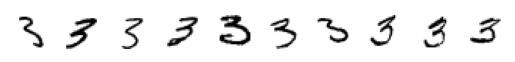

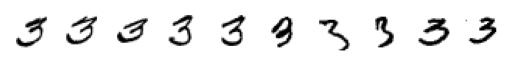

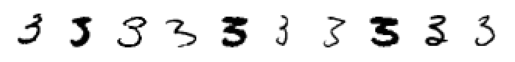

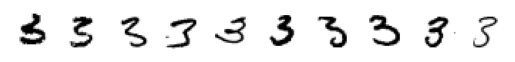

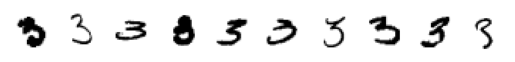

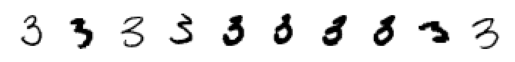

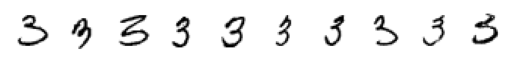

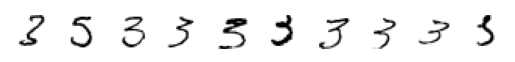

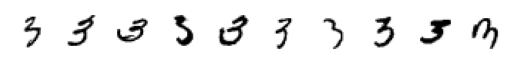

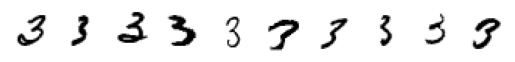

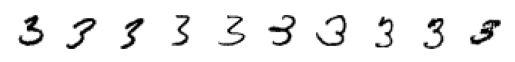

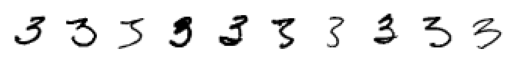

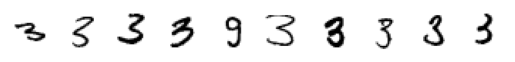

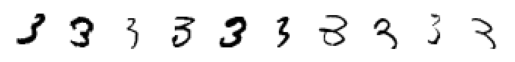

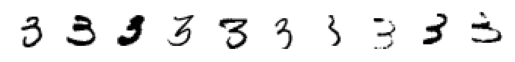

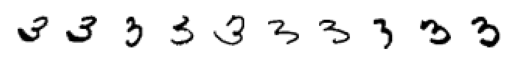

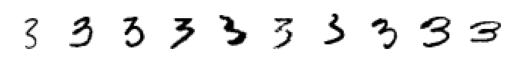

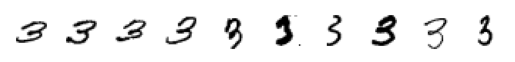

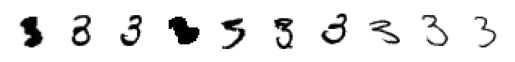

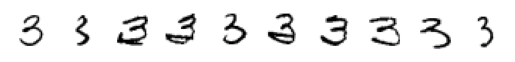

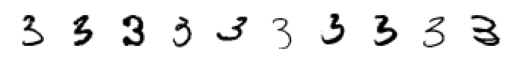

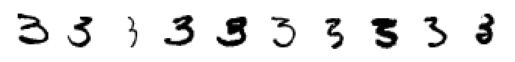

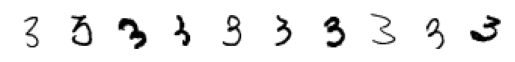

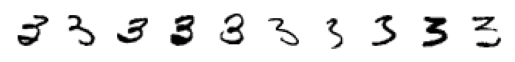

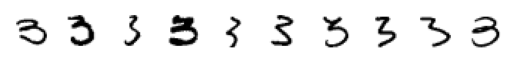

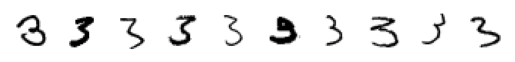

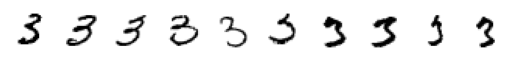

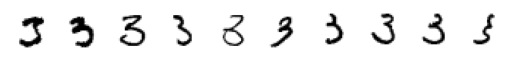

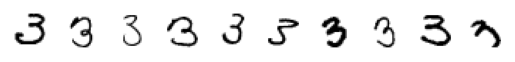

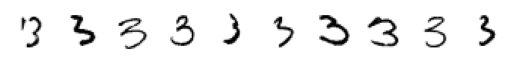

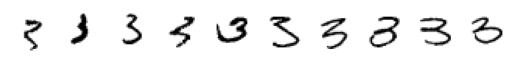

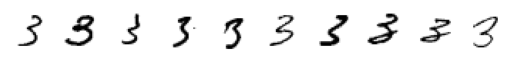

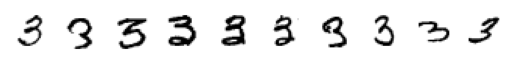

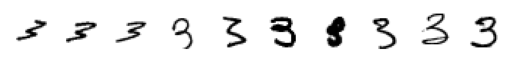

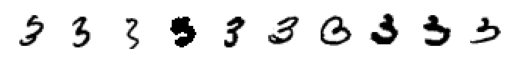

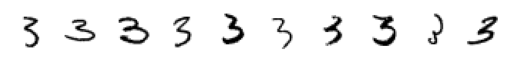

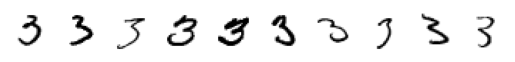

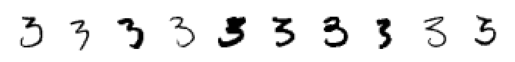

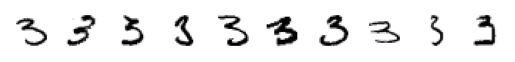

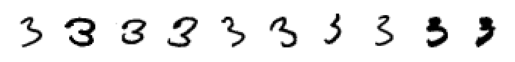

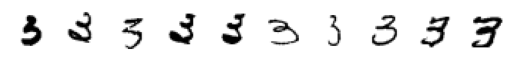

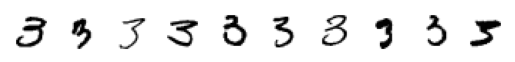

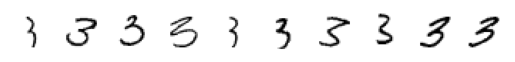

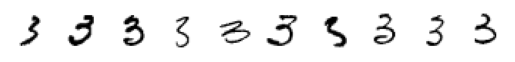

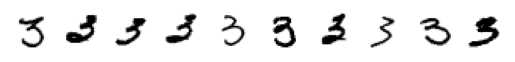

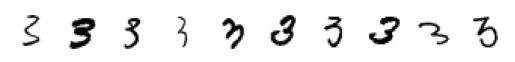

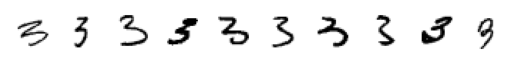

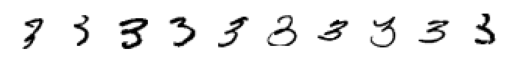

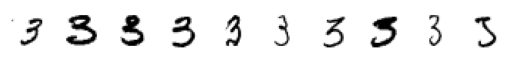

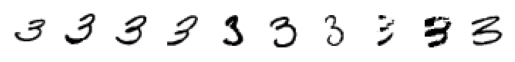

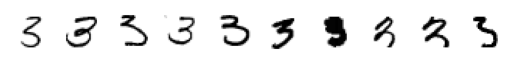

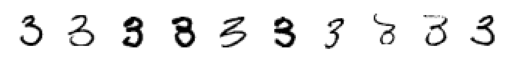

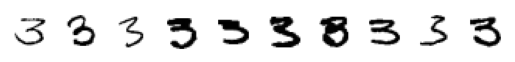

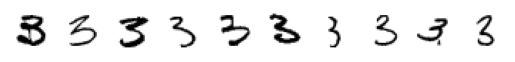

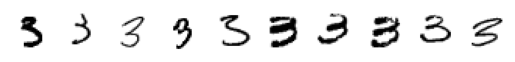

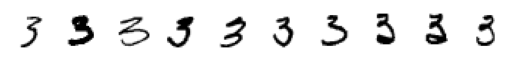

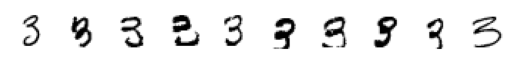

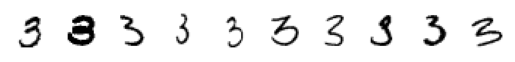

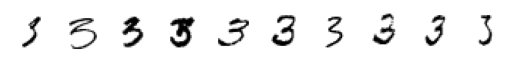

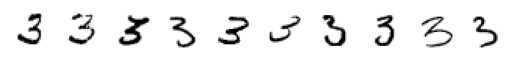

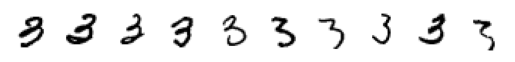

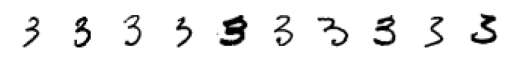

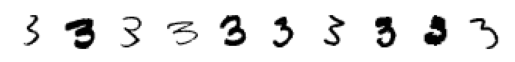

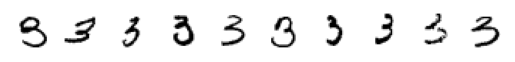

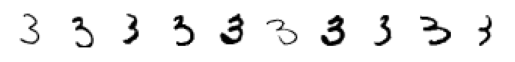

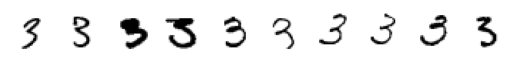

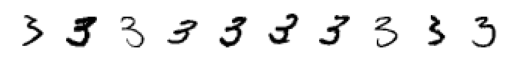

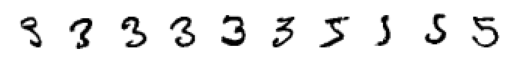

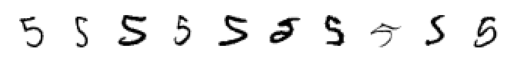

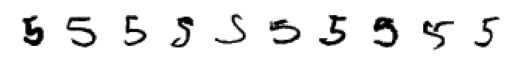

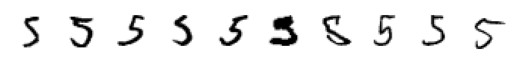

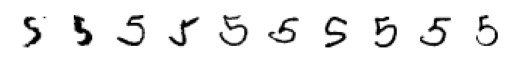

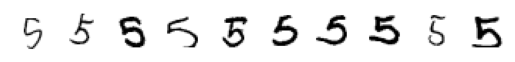

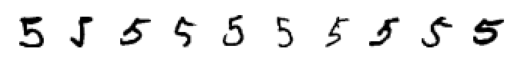

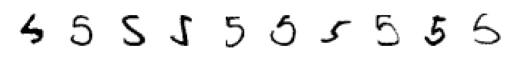

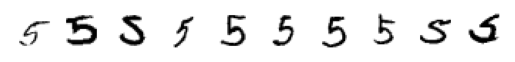

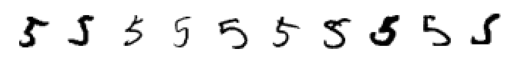

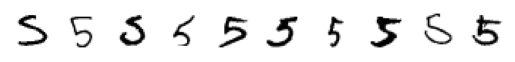

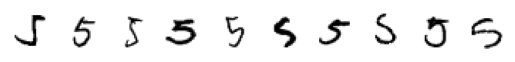

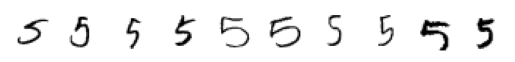

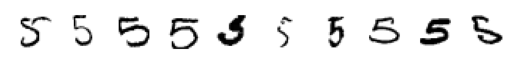

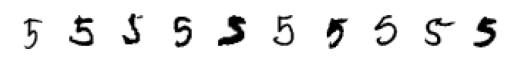

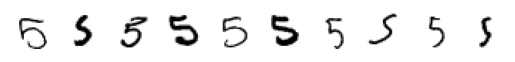

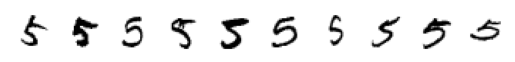

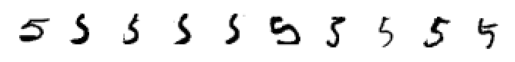

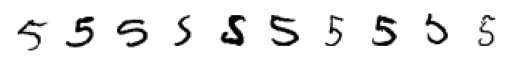

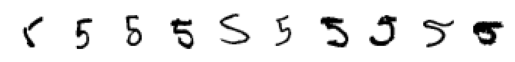

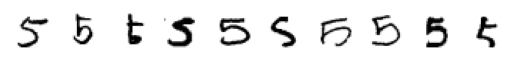

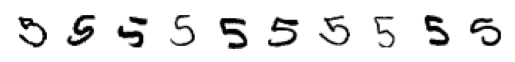

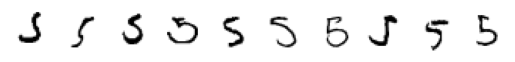

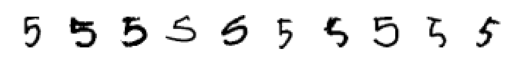

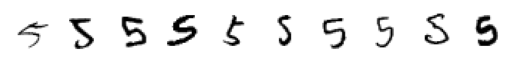

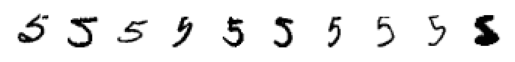

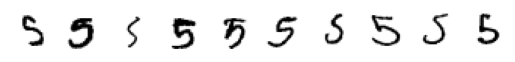

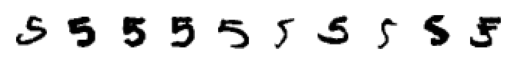

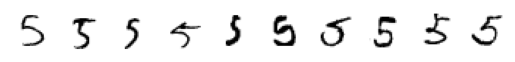

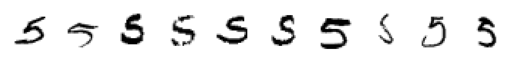

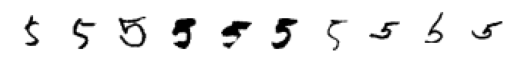

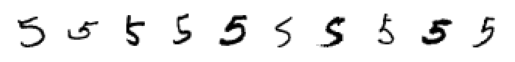

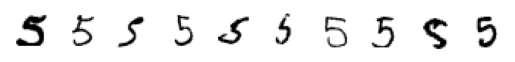

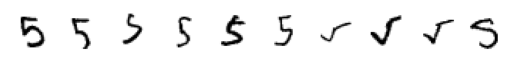

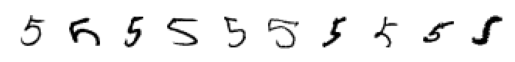

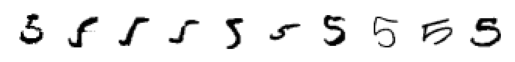

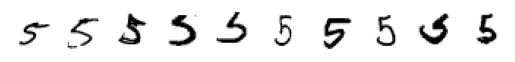

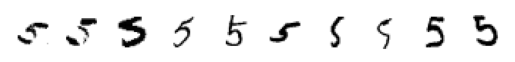

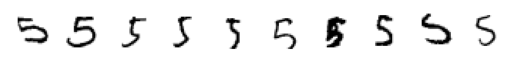

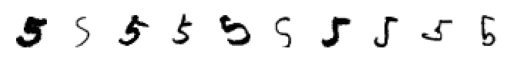

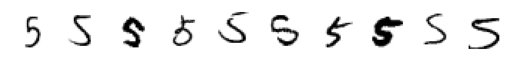

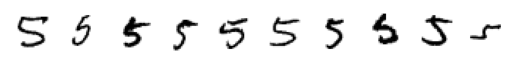

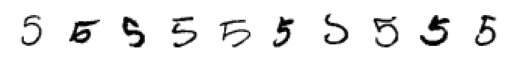

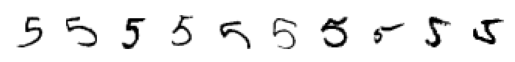

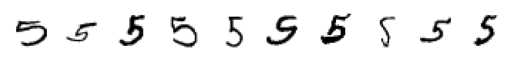

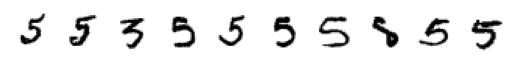

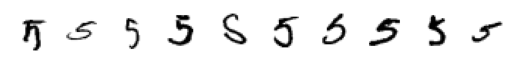

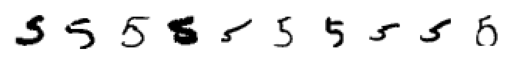

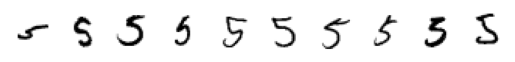

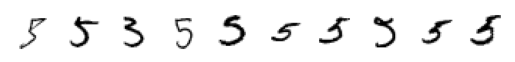

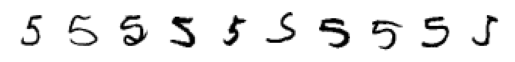

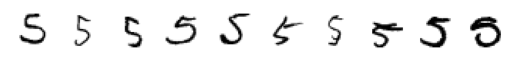

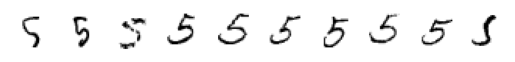

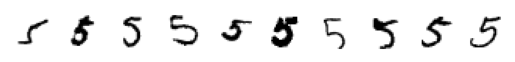

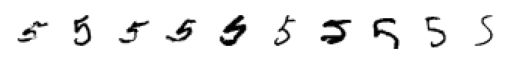

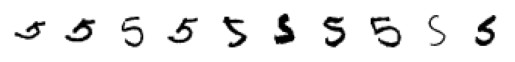

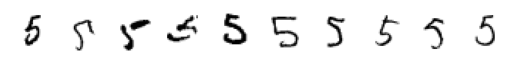

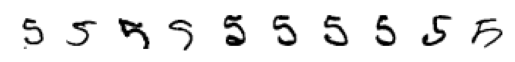

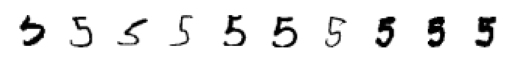

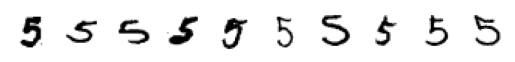

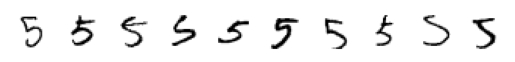

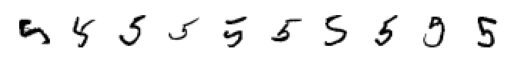

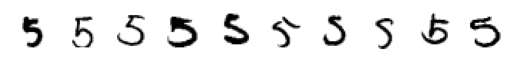

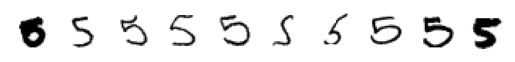

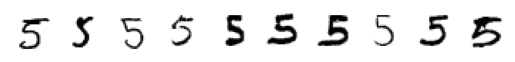

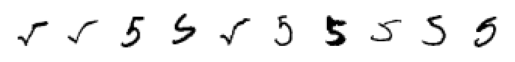

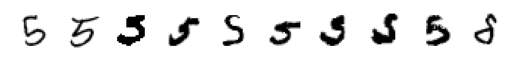

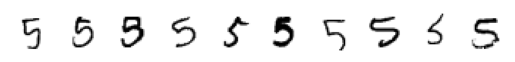

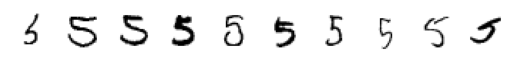

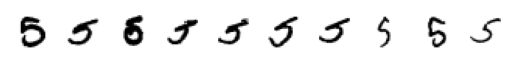

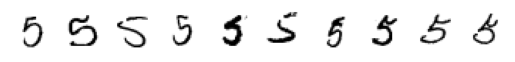

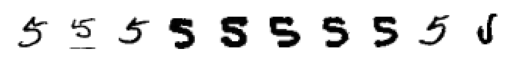

In [31]:
show_images(support_vectors)

In [32]:
feat_cols = [ 'pixel'+str(i) for i in range(X_35.shape[1]) ]

df = pd.DataFrame(X_35,columns=feat_cols)
df['y'] = y_35
df['label'] = df['y'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
N = 10000
df_subset = df.loc[rndperm[:],:].copy()
data_subset = df_subset[feat_cols].values
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Size of the dataframe: (13454, 786)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 13454 samples in 0.046s...
[t-SNE] Computed neighbors for 13454 samples in 2.986s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13454
[t-SNE] Computed conditional probabilities for sample 2000 / 13454
[t-SNE] Computed conditional probabilities for sample 3000 / 13454
[t-SNE] Computed conditional probabilities for sample 4000 / 13454
[t-SNE] Computed conditional probabilities for sample 5000 / 13454
[t-SNE] Computed conditional probabilities for sample 6000 / 13454
[t-SNE] Computed conditional probabilities for sample 7000 / 13454
[t-SNE] Computed conditional probabilities for sample 8000 / 13454
[t-SNE] Computed conditional probabilities for sample 9000 / 13454
[t-SNE] Computed conditional probabilities for sample 10000 / 13454
[t-SNE] Computed conditional probabilities for sample 11000 / 13454
[t-SNE] Computed conditional probabilities for sample 12000 / 13454
[t-SNE] Compu

df 13454
threes 7141
fives 6313


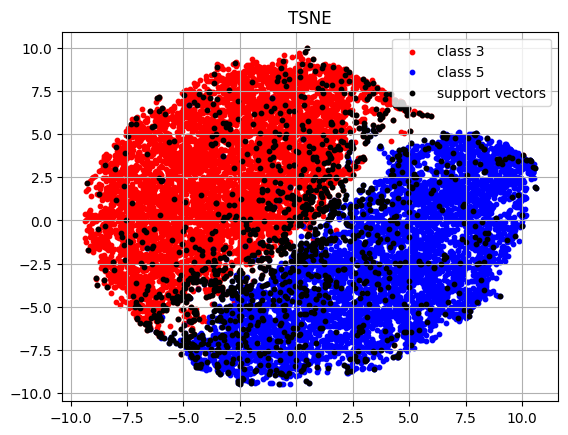

In [35]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
threes = df_subset.loc[df['y'] == 3].copy()
fives = df_subset.loc[df['y'] == 5].copy()

print('df', len(df))
print('threes', len(threes))
print('fives', len(fives))
plt.figure(8)
plt.scatter(threes['tsne-2d-one'], threes['tsne-2d-two'], c = 'r', s = 10, label = 'class 3')
plt.scatter(fives['tsne-2d-one'], fives['tsne-2d-two'], c = 'b', s = 10, label = 'class 5')
plt.scatter(df_subset['tsne-2d-one'][support_indices], df_subset['tsne-2d-two'][support_indices], c = 'black', s = 10, label = 'support vectors')
plt.legend()
plt.grid()
plt.title('TSNE')
plt.show()

In [ ]:
clf_svm = SVC(kernel='linear') #kernel='linear', default='rbf'

start = time.time()
clf_svm.fit(train_x35, train_y35)
print("time: ", time.time() - start)

prediction = clf_svm.predict(test_x35)
support_vectors = clf_svm.support_vectors_
support_indices = clf_svm.support_

print(support_indices)
print(len(support_indices))